## This project is splitted into three main section 
* Understanding the business (Data)
* Apply univariant Analysis (categorical, numerical)
* Apply Bivariant Analysis (2 features analysis)

### Required libraries and configuring seaborn style

In [31]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [32]:
sns.set(rc={'figure.figsize':(18,9)})
sns.set_palette('rocket')
sns.set_style('whitegrid')

In [33]:
# scaning the csv file to dataframe 
df = pd.read_csv('bikes_mod.csv')

#### Get infromation about data set 
* Data set consist of 12 feature and 10885 record 
* Data types of the feature are (float64(6), int64(3), object(3))
* there are missing value in some feature like (temp , humidity , .... )
* memory usage of data is 1020.7+ KB

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


## Data types of each feature

In [4]:
df.dtypes

datetime               object
season                 object
holiday               float64
workingday            float64
weather                object
temp                  float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
rented_bikes_count      int64
Profit                float64
dtype: object

## mean for columns that has a numeric type and meaningful data

In [280]:
df.loc[:,'temp':'Profit'].median()

temp                   20.500000
humidity               62.000000
windspeed              12.998000
casual                 17.000000
registered            118.000000
rented_bikes_count    145.000000
Profit                889.928767
dtype: float64

## median for columns that has a numeric type and meaningful data

In [5]:
df.loc[:,'temp':'Profit'].mean()

temp                    20.317665
humidity                61.790673
windspeed               12.708806
casual                  36.021955
registered             155.552177
rented_bikes_count     191.574132
Profit                1288.280751
dtype: float64

## Shape of data (no of rows and columns)

In [8]:
print(f"no of row = {df.shape[0]} \nno of columns (features) = {df.shape[1]}")

no of row = 10886 
no of columns (features) = 12


## number of missing values in each colums

In [13]:
No_missing_data = df.isnull().sum().to_frame()
No_missing_data.columns = ['No_missing_data']
No_missing_data

,No_missing_data
datetime,0
season,214
holiday,856
workingday,1498
weather,2140
temp,2782
humidity,3424
windspeed,4066
casual,0
registered,0


## Number of duplicated Values

In [15]:
# Data Contains 0 duplicated Data
df.duplicated().sum()

0

## getting descriptive statistics over the numeric columns

In [214]:
df.loc[:, 'temp':'Profit'].describe()

,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
count,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,1288.280751
std,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,1309.683400
min,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767
25%,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767
50%,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767
75%,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767
max,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767


## check correlation between each two numeric features

In [204]:
corr_map = df.loc[:,'temp':'Profit'].corr()
corr_map

,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
temp,1.000000,-0.068240,-0.025425,0.466035,0.315430,0.391867,0.462618
humidity,-0.068240,1.000000,-0.312628,-0.344939,-0.266432,-0.317282,-0.358150
windspeed,-0.025425,-0.312628,1.000000,0.085055,0.089105,0.097747,0.100205
casual,0.466035,-0.344939,0.085055,1.000000,0.497250,0.690414,0.902713
registered,0.315430,-0.266432,0.089105,0.497250,1.000000,0.970948,0.822156
rented_bikes_count,0.391867,-0.317282,0.097747,0.690414,0.970948,1.000000,0.934490
Profit,0.462618,-0.358150,0.100205,0.902713,0.822156,0.934490,1.000000


## Check head and tail of first and last five rows

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767


In [19]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767
10885,2012-12-19 23:00:00,Winter,0.0,1.0,Clear,13.12,66.0,8.9981,4,84,88,429.828767


# univariant analysis

### distripution and analysis for each numerical features

### distripution and analysis for temp feature

In [215]:
# Describtive statistics on temperature feature
df['temp'].describe().to_frame()

,temp
count,8104.000000
mean,20.317665
std,7.818568
min,0.820000
25%,13.940000
50%,20.500000
75%,26.240000
max,41.000000


<AxesSubplot:xlabel='temp', ylabel='Count'>

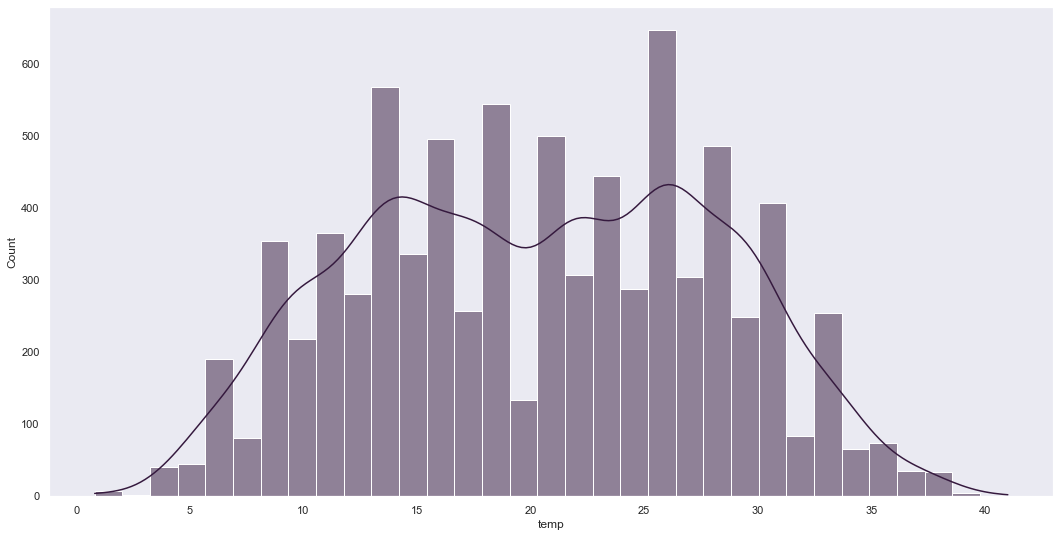

In [35]:
sns.set_style('dark')
sns.histplot(data=df, x = 'temp',kde = True)

<AxesSubplot:xlabel='temp'>

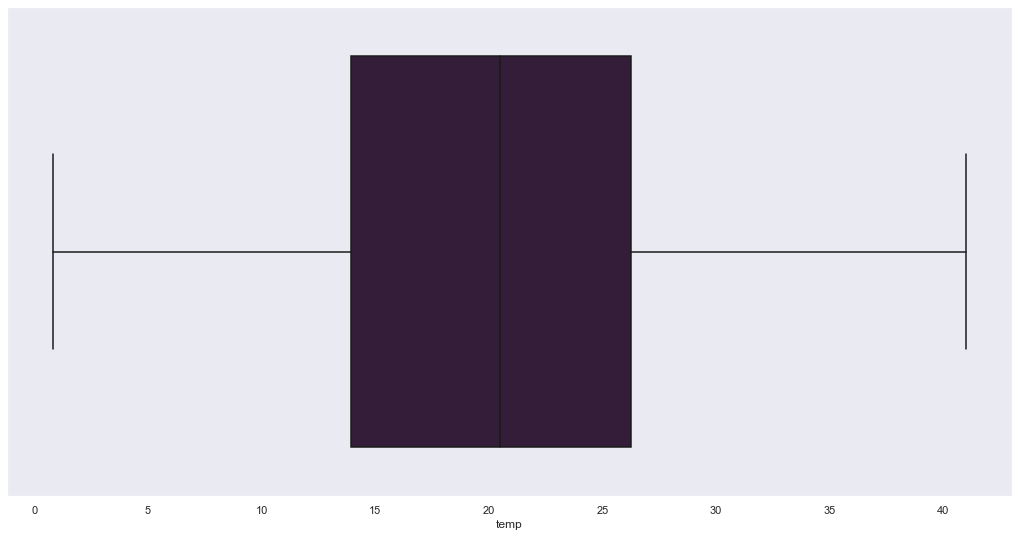

In [39]:
# No Outliers in temperature feature
sns.boxplot(data=df,x='temp')

### distripution and analysis for humidity feature

In [216]:
# Describtive statistics on humidity feature
df['humidity'].describe().to_frame()

,humidity
count,7462.000000
mean,61.790673
std,19.262084
min,0.000000
25%,47.000000
50%,62.000000
75%,77.000000
max,100.000000


<AxesSubplot:xlabel='humidity', ylabel='Count'>

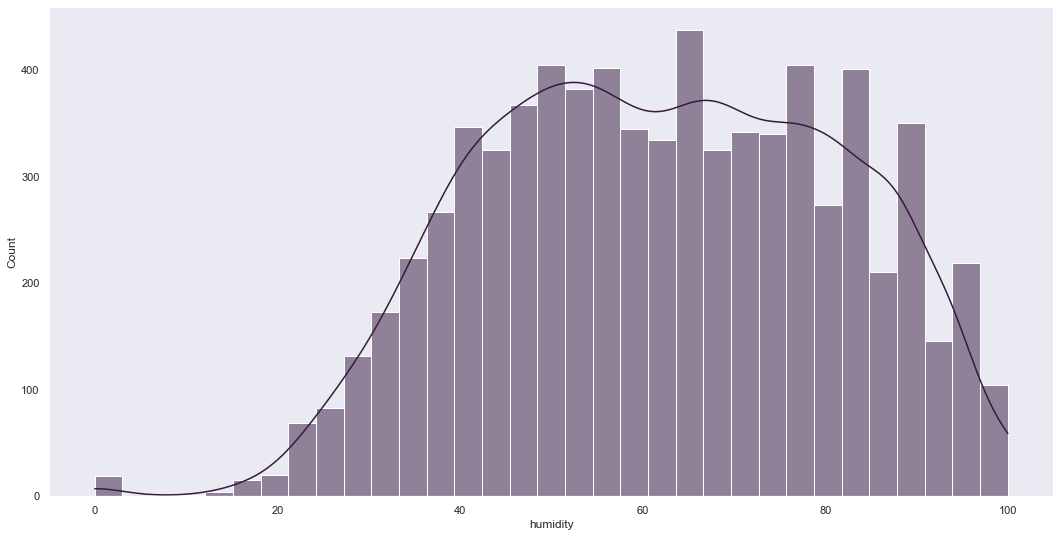

In [77]:
sns.set_style('dark')
sns.histplot(data=df, x = 'humidity',kde = True)

<AxesSubplot:xlabel='humidity'>

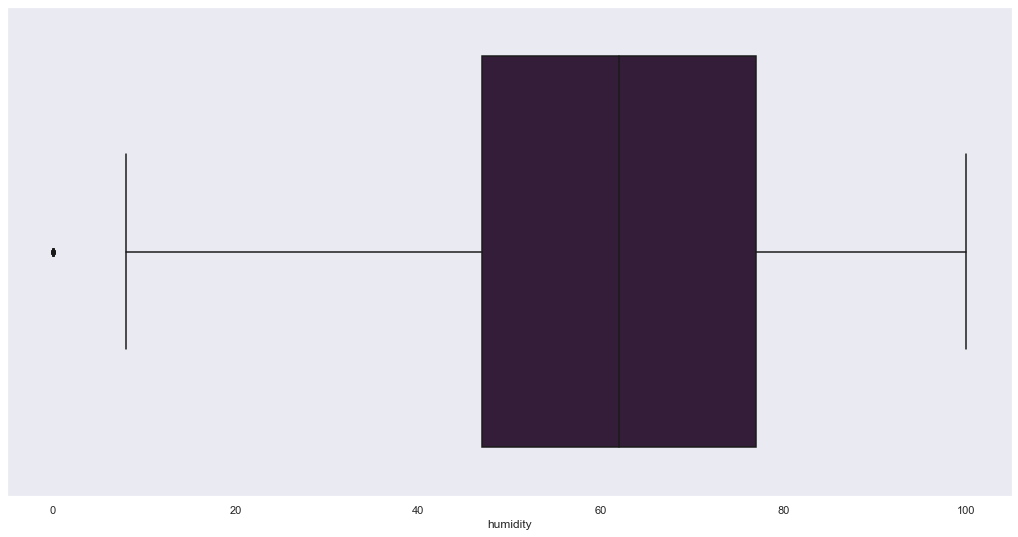

In [78]:
sns.boxplot(data=df,x='humidity')

In [79]:
q1 = df['humidity'].quantile(0.25)
q3 = df['humidity'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [80]:
df[(df['humidity'] > max_whisker) | (df['humidity'] < min_whisker)].shape[0]

19

#### it has only 19 outlires will be shown below

In [81]:
df[(df['humidity'] > max_whisker) | (df['humidity'] < min_whisker)][['humidity']]

,humidity
1091,0.0
1093,0.0
1094,0.0
1095,0.0
1096,0.0
1097,0.0
1098,0.0
1099,0.0
1100,0.0
1101,0.0


### distripution and analysis for casual feature

In [217]:
# Describtive statistics on casual feature
df['casual'].describe().to_frame()

,casual
count,10886.000000
mean,36.021955
std,49.960477
min,0.000000
25%,4.000000
50%,17.000000
75%,49.000000
max,367.000000


<AxesSubplot:xlabel='casual', ylabel='Count'>

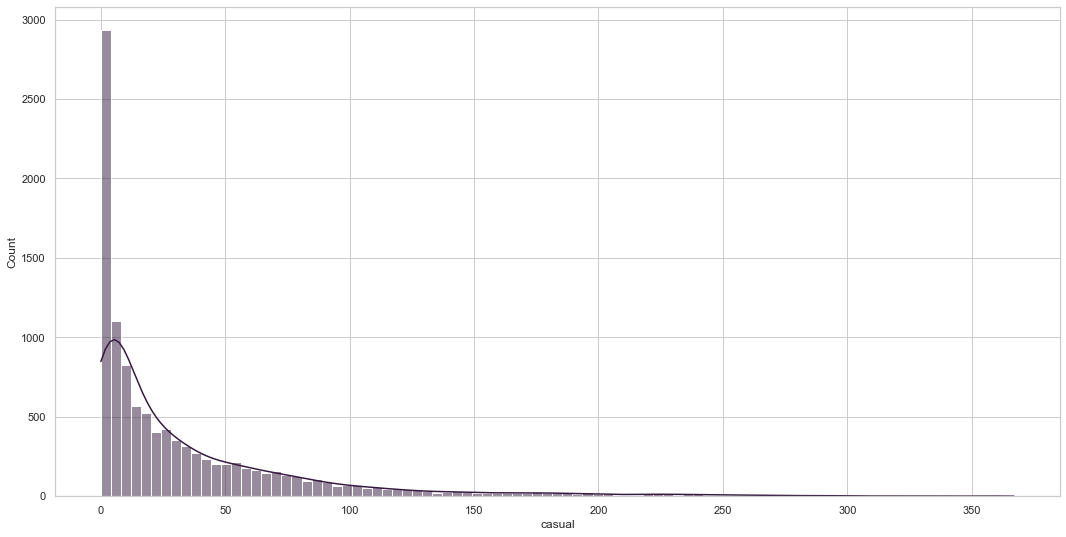

In [218]:
# it has a positive (right) skewness
sns.histplot(data=df, x = 'casual',kde= True)

<AxesSubplot:xlabel='casual'>

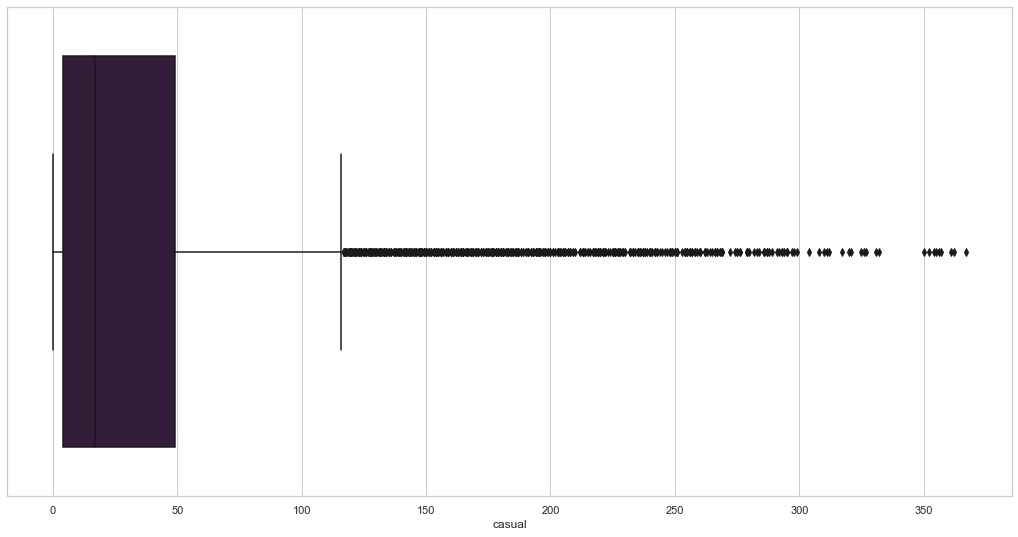

In [219]:
sns.boxplot(data=df,x='casual')

In [56]:
q1 = df['casual'].quantile(0.25)
q3 = df['casual'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [57]:
df[(df['casual'] > max_whisker) | (df['casual'] < min_whisker)].shape[0]

749

#### it has  749 outlires will be shown below

In [58]:
df[(df['casual'] > max_whisker) | (df['casual'] < min_whisker)][['casual']]

,casual
1173,144
1174,149
1175,124
1311,126
1312,174
...,...
10610,122
10611,148
10612,164
10613,167


## distripution and analysis for registered feature

In [221]:
# Describtive statistics on registered feature
df['registered'].describe().to_frame()

,registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


<AxesSubplot:xlabel='registered', ylabel='Count'>

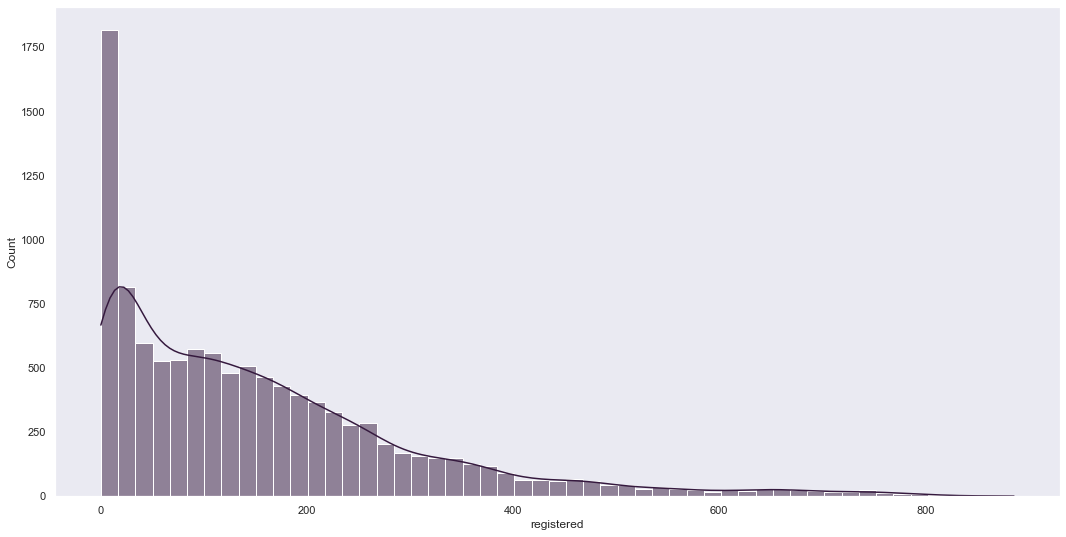

In [86]:
# it has a positive (right) skewness
sns.histplot(data=df, x = 'registered',kde= True)

<AxesSubplot:xlabel='registered'>

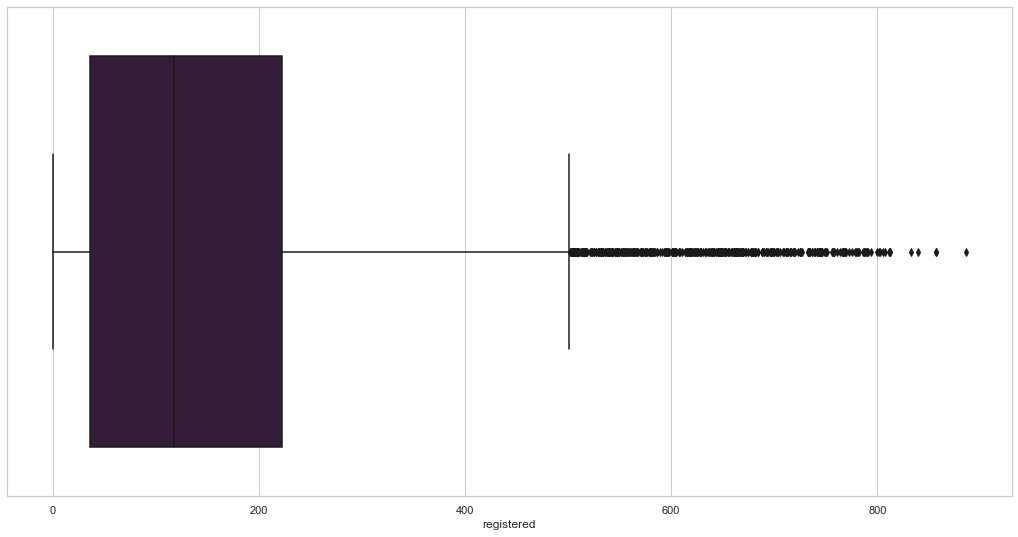

In [222]:
sns.boxplot(data=df,x='registered')

In [90]:
q1 = df['registered'].quantile(0.25)
q3 = df['registered'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [91]:
df[(df['registered'] > max_whisker) | (df['registered'] < min_whisker)].shape[0]

423

#### it has  423 outlires will be shown below

In [92]:
df[(df['registered'] > max_whisker) | (df['registered'] < min_whisker)][['registered']]

,registered
1987,539
2011,532
2059,540
2179,521
2371,516
...,...
10855,533
10856,512
10870,665
10879,536


## distripution and analysis for windspeed feature

In [223]:
# Describtive statistics on windspeed feature
df['windspeed'].describe().to_frame()

,windspeed
count,6820.000000
mean,12.708806
std,8.131154
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


<AxesSubplot:xlabel='windspeed', ylabel='Count'>

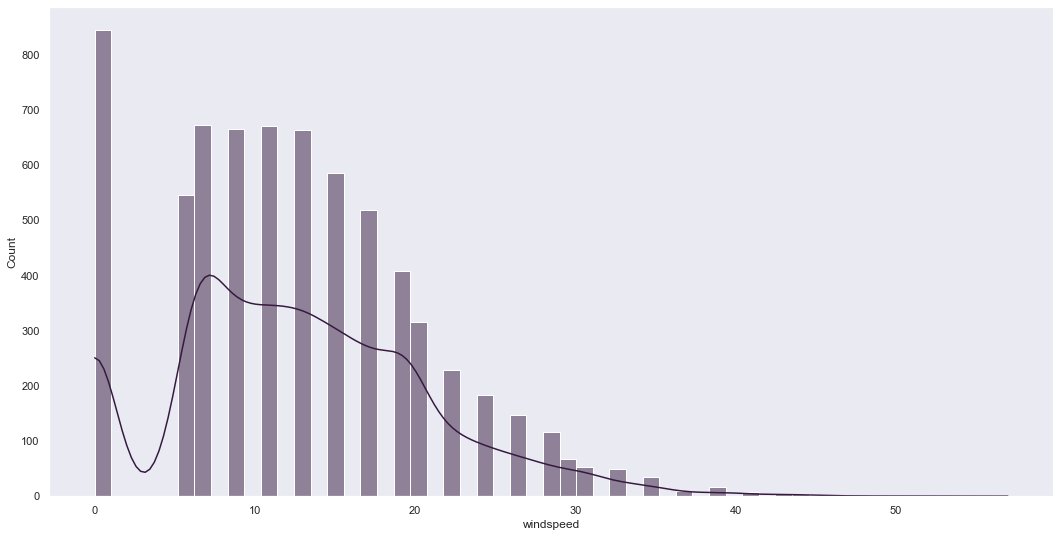

In [95]:
# it has a positive (right) skewness
sns.histplot(data=df, x = 'windspeed',kde= True)

<AxesSubplot:xlabel='windspeed'>

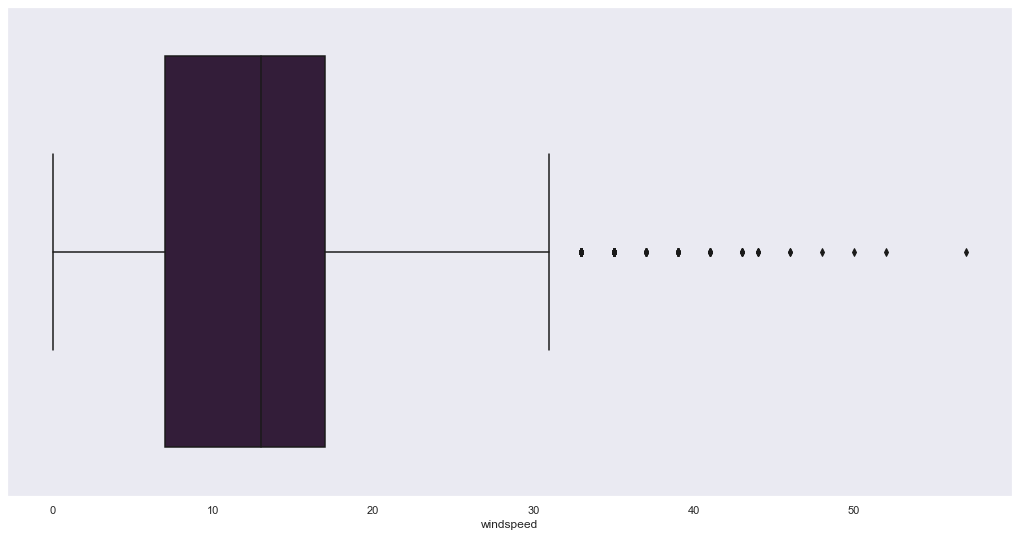

In [96]:
sns.boxplot(data=df,x='windspeed')

In [97]:
q1 = df['windspeed'].quantile(0.25)
q3 = df['windspeed'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [98]:
df[(df['windspeed'] > max_whisker) | (df['windspeed'] < min_whisker)].shape[0]

132

#### wind speed feature has 132 oultier values as shown below and above

In [99]:
df[(df['windspeed'] > max_whisker) | (df['windspeed'] < min_whisker)][['windspeed']]

,windspeed
178,36.9974
194,35.0008
196,35.0008
271,35.0008
471,35.0008
...,...
9480,39.0007
9652,35.0008
9655,35.0008
9755,32.9975


## distripution and analysis for rented_bikes feature

In [101]:
# Describtive statistics on rented_bikes feature
df['rented_bikes_count'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rented_bikes_count,10886.0,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0


<AxesSubplot:xlabel='rented_bikes_count', ylabel='Count'>

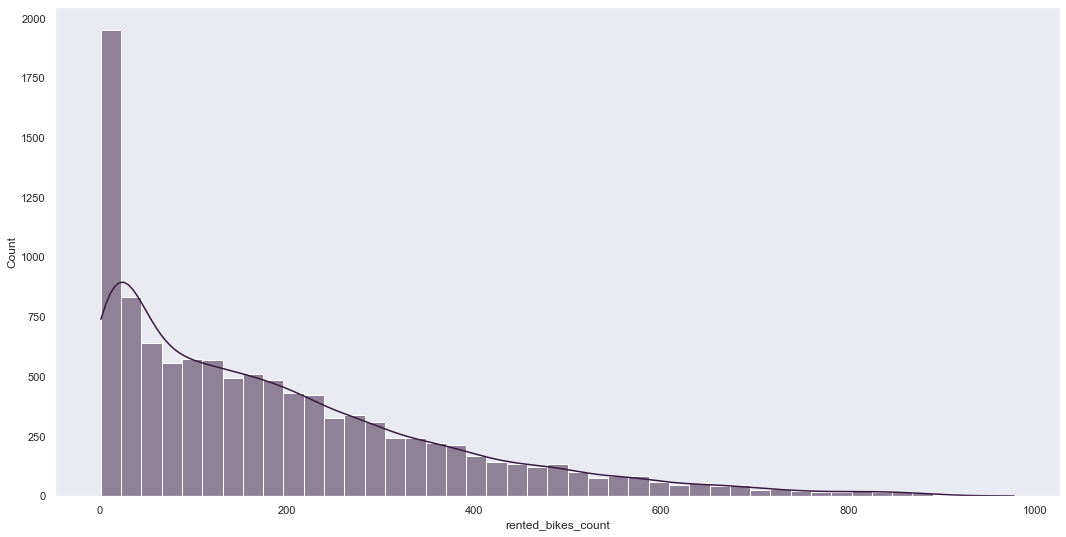

In [103]:
# it has a positive (right) skewness
sns.histplot(data=df, x = 'rented_bikes_count',kde= True)

<AxesSubplot:xlabel='rented_bikes_count'>

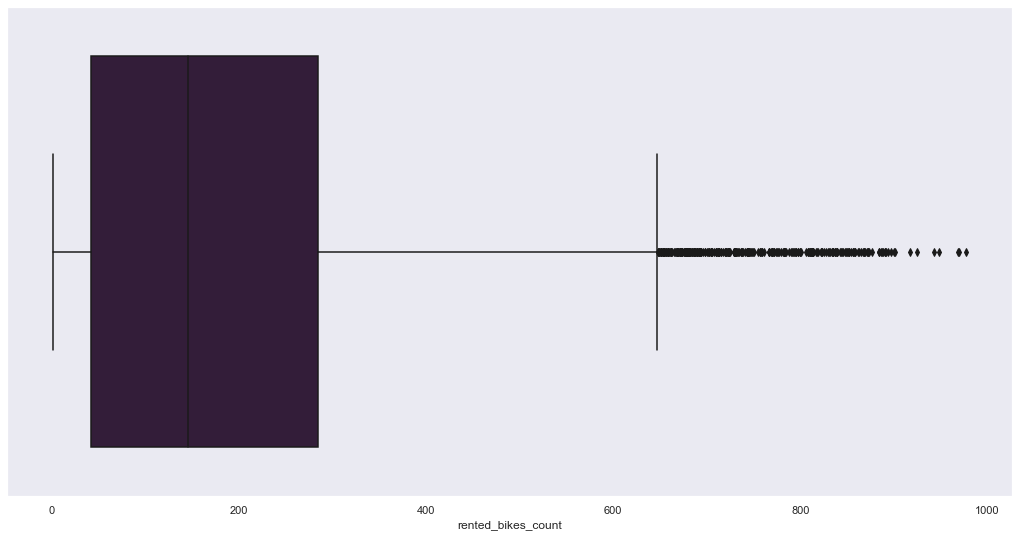

In [104]:
sns.boxplot(data=df,x='rented_bikes_count')

In [117]:
q1 = df['rented_bikes_count'].quantile(0.25)
q3 = df['rented_bikes_count'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [118]:
df[(df['rented_bikes_count'] > max_whisker) | (df['rented_bikes_count'] < min_whisker)].shape[0]

300

#### rented_bikes feature has 300 oultier values as shown below and above

In [119]:
df[(df['rented_bikes_count'] > max_whisker) | (df['rented_bikes_count'] < min_whisker)][['rented_bikes_count']]

,rented_bikes_count
6611,712
6634,676
6635,734
6649,662
6658,782
...,...
10678,724
10702,688
10726,679
10846,662


## distripution and analysis for Profit feature

In [224]:
# Describtive statistics on profit feature
df['Profit'].describe().to_frame()

,Profit
count,10886.000000
mean,1288.280751
std,1309.683400
min,4.128767
25%,253.528767
50%,889.928767
75%,1891.828767
max,7881.728767


<AxesSubplot:xlabel='Profit', ylabel='Count'>

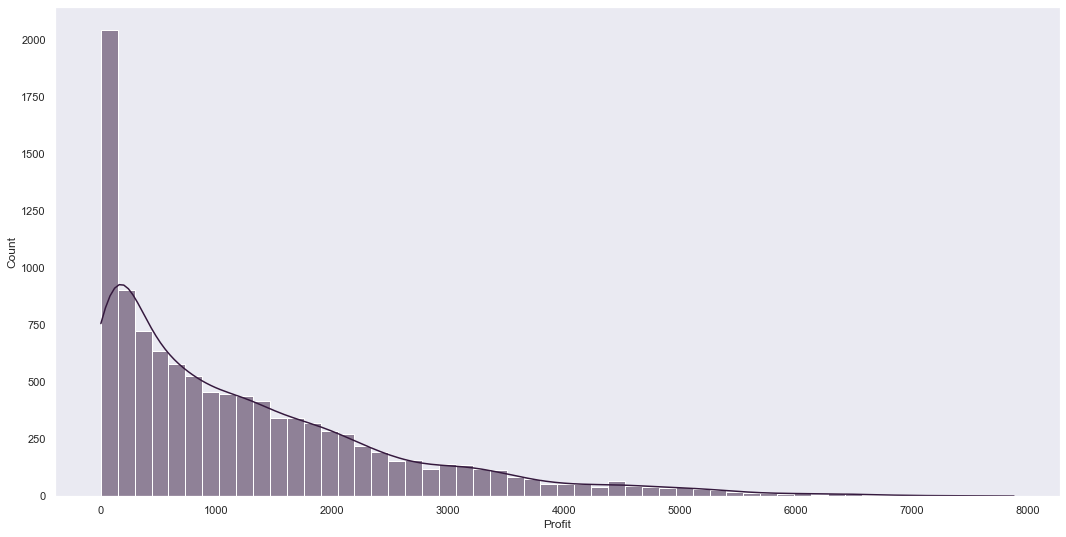

In [121]:
# it has a positive (right) skewness
sns.histplot(data=df, x = 'Profit',kde= True)

<AxesSubplot:xlabel='Profit'>

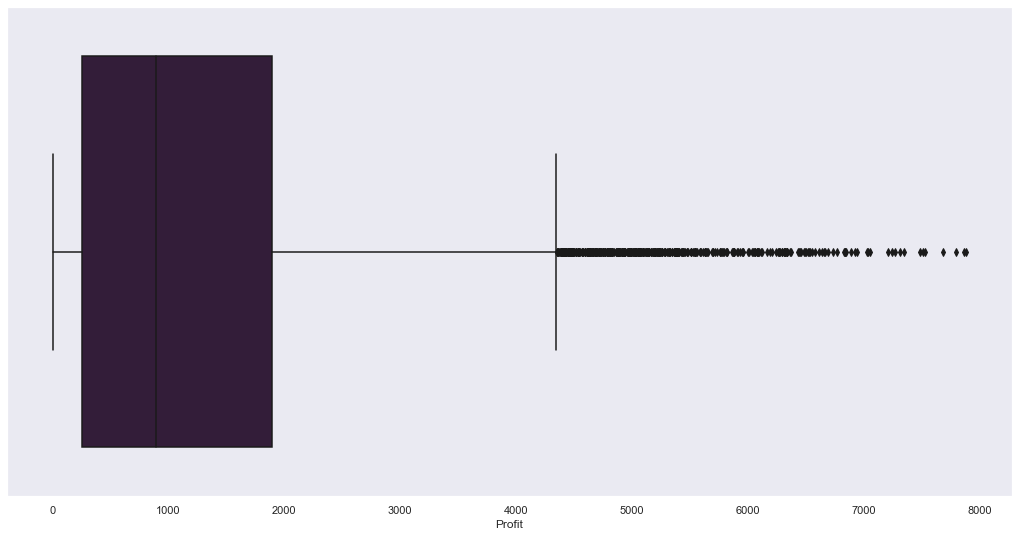

In [122]:
sns.boxplot(data=df,x='Profit')

In [123]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
iqr = q3 - q1
max_whisker = q3 + (1.5*iqr)
min_whisker = q1 - (1.5*iqr)

In [124]:
df[(df['Profit'] > max_whisker) | (df['Profit'] < min_whisker)].shape[0]

433

#### profit feature has 433 oultier values as shown below and above

In [125]:
df[(df['Profit'] > max_whisker) | (df['Profit'] < min_whisker)][['Profit']][['Profit']]

,Profit
1384,4403.028767
1385,4596.528767
1935,4403.028767
2127,4476.128767
2129,4630.928767
...,...
10371,4566.428767
10372,4643.828767
10373,4618.028767
10612,4446.028767


## distripution and analysis for each categorical features

### distripution for season feature

In [127]:
x = df['season'].value_counts()

In [130]:
# the rest of the season feature values is nan :(
x

Winter    2688
Fall      2680
Summer    2670
Spring    2634
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

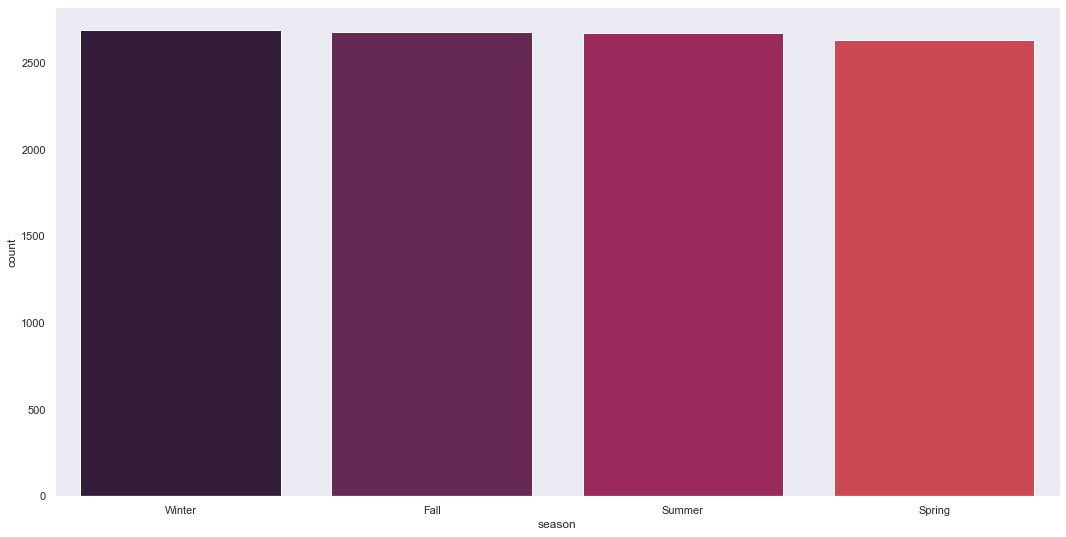

In [129]:
sns.countplot(data=df, x = 'season',order=x.index)

### distripution for weather feature

In [131]:
x = df['weather'].value_counts()

In [132]:
x

Clear    5793
Mist     2259
Rainy     693
Snowy       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

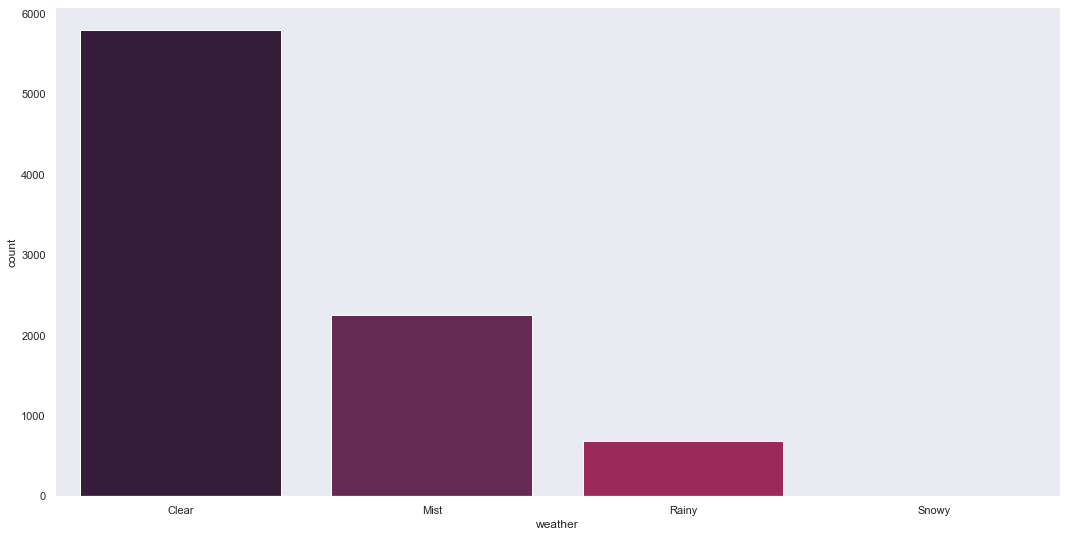

In [133]:
sns.countplot(data=df, x = 'weather',order=x.index)

# BiVariant Analysis

# 1- which month has a higher profit

In [134]:
# exctract a year,month, and hour features from date time
df['year'] = df['datetime'].str.slice(start=0,stop=4)
df['month'] = df['datetime'].apply(lambda x: x.split('-')[1])
df['hour'] = df['datetime'].str.slice(start=11,stop=13)

In [135]:
x = df.groupby('month')['Profit'].sum().sort_values(ascending=False)
x

month
07    1.579913e+06
06    1.575600e+06
08    1.509686e+06
09    1.505842e+06
05    1.393052e+06
10    1.383133e+06
04    1.233261e+06
11    1.085590e+06
03    8.971224e+05
12    8.781618e+05
02    5.459629e+05
01    4.369006e+05
Name: Profit, dtype: float64

In [136]:
x.sort_values(ascending=False).idxmax()

'07'

<AxesSubplot:xlabel='month', ylabel='Profit'>

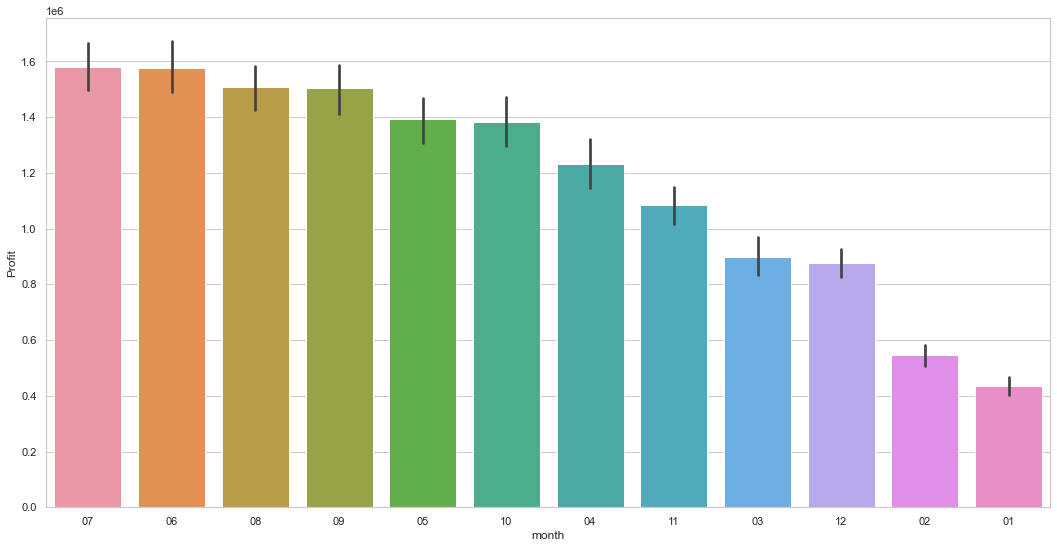

In [138]:
sns.set_style('whitegrid')
sns.barplot(data=df, x = 'month', y= 'Profit',order=x.index,estimator=sum)

# 2- which season has a higher, lower profit

In [139]:
x = df.groupby('season')['Profit'].sum().sort_values(ascending=False)
x

season
Fall      4.509295e+06
Summer    4.093775e+06
Winter    3.286013e+06
Spring    1.836294e+06
Name: Profit, dtype: float64

In [140]:
x.sort_values(ascending=False).idxmax(), x.sort_values(ascending=False).idxmin()

('Fall', 'Spring')

<AxesSubplot:xlabel='season', ylabel='Profit'>

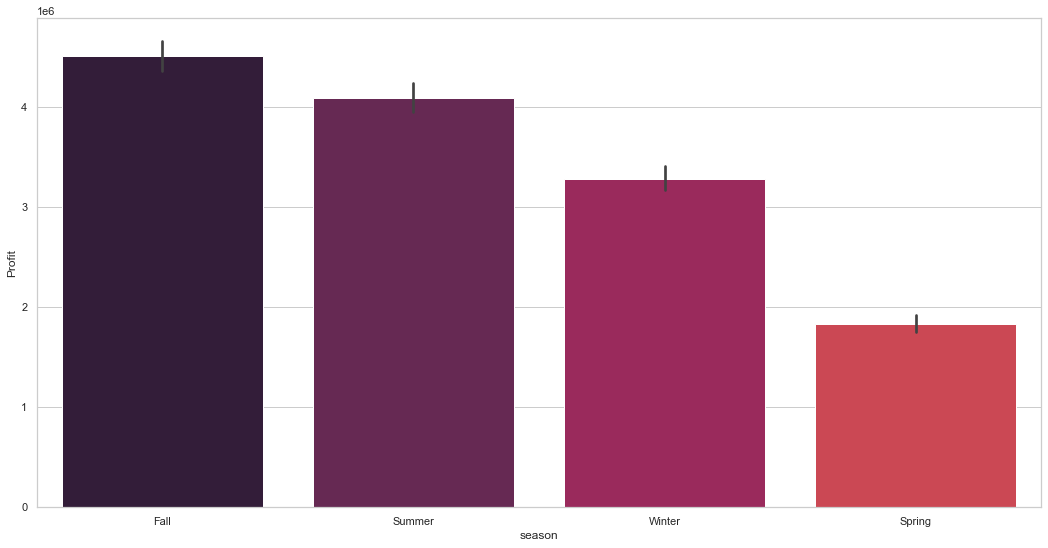

In [141]:
sns.barplot(data=df,x= 'season',y= 'Profit',order=x.index,estimator= sum)

# 3- per each season which month has a higher profit

In [236]:
x = df.groupby(['season','month'])[['Profit']].sum()
x.reset_index(inplace=True)
x

,season,month,Profit
0,Fall,07,1.540443e+06
1,Fall,08,1.486163e+06
2,Fall,09,1.482689e+06
3,Spring,01,4.266009e+05
4,Spring,02,5.427654e+05
5,Spring,03,8.669276e+05
6,Summer,04,1.197820e+06
7,Summer,05,1.363183e+06
8,Summer,06,1.532771e+06
9,Winter,10,1.364758e+06


<AxesSubplot:xlabel='season', ylabel='Profit'>

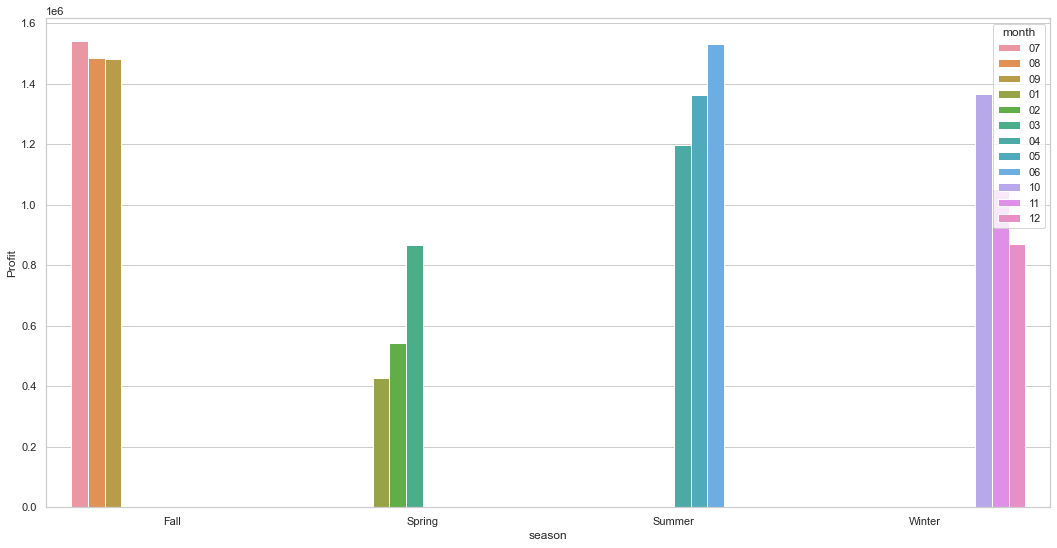

In [240]:
sns.barplot(data = x, x = x['season'], y= x['Profit'], hue = x['month'])

In [233]:
p = pd.pivot_table(data=df, index='season', columns= 'month',values = 'Profit',aggfunc=sum)
p

month,01,02,03,04,05,06,07,08,09,10,11,12
season,,,,,,,,,,,,
Fall,NaN,NaN,NaN,NaN,NaN,NaN,1.540443e+06,1.486163e+06,1.482689e+06,NaN,NaN,NaN
Spring,426600.912329,542765.431507,866927.628767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summer,NaN,NaN,NaN,1.197820e+06,1.363183e+06,1.532771e+06,NaN,NaN,NaN,NaN,NaN,NaN
Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.364758e+06,1.051661e+06,869593.819178


<AxesSubplot:xlabel='month', ylabel='season'>

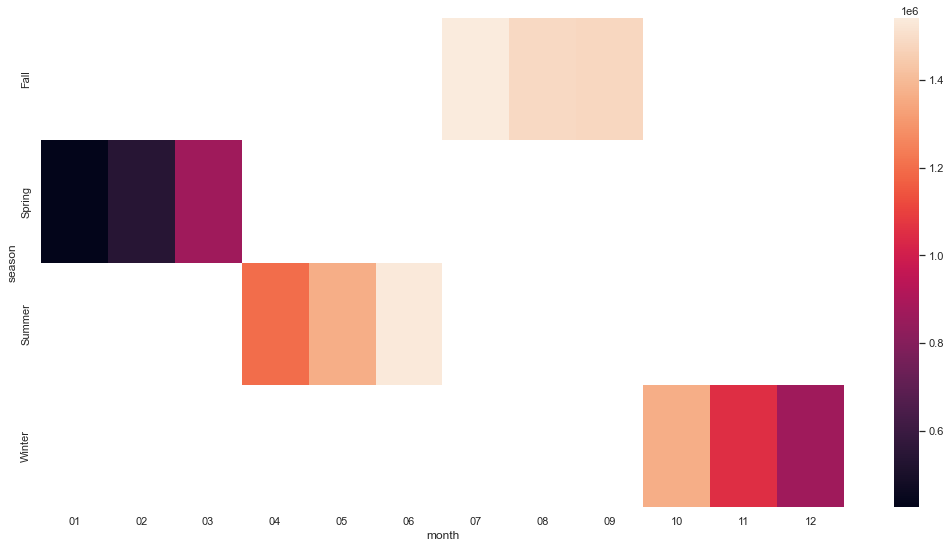

In [234]:
sns.heatmap(p)

#### understandable because the season has only fixed months so the other months will be nan values

# 4- sum the number of rented bikes per day due to month and year

In [146]:
# extracting feature date for grouping by it to sum over each day 
df['date'] = df['datetime'].str.slice(start=0,stop=10)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month,hour,date
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,01,00,2011-01-01
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,01,01,2011-01-01
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,01,02,2011-01-01
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,01,03,2011-01-01
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,01,04,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,12,19,2012-12-19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,12,20,2012-12-19
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,12,21,2012-12-19
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,12,22,2012-12-19


In [147]:
x = df.groupby('date')[['rented_bikes_count']].sum().sort_values(by = 'date')
x

,rented_bikes_count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


## 5- find the number of rented bikes per each season 

In [160]:
x = df.groupby('season')[['rented_bikes_count']].sum().sort_values(by = 'rented_bikes_count',ascending = False)
x

,rented_bikes_count
season,
Fall,628384
Summer,573280
Winter,534031
Spring,305779


<AxesSubplot:xlabel='season', ylabel='rented_bikes_count'>

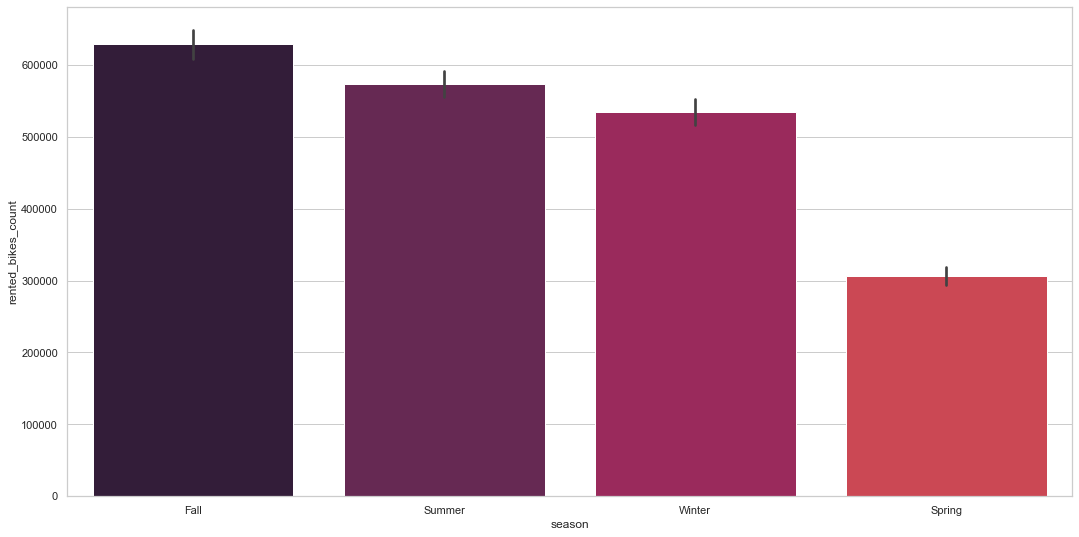

In [161]:
sns.barplot(data=df, x = 'season', y= 'rented_bikes_count',estimator=sum, order=x.index)

## 6- find the number of registered, casual per each season

In [165]:
x = df.groupby('season').sum()[['registered','casual']].sort_values(by = ['registered','casual'])
x

,registered,casual
season,,
Spring,265322,40457
Summer,446991,126289
Winter,457276,76755
Fall,488252,140132


<AxesSubplot:ylabel='season'>

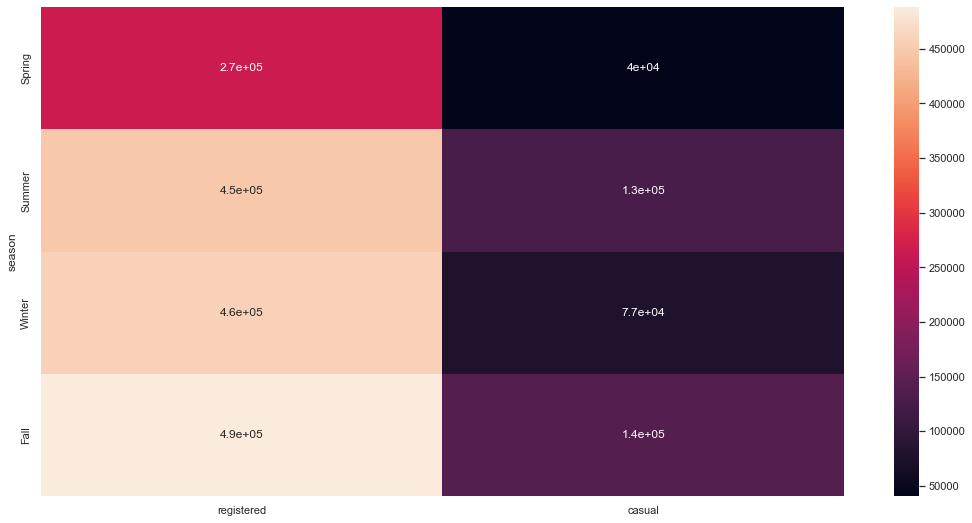

In [167]:
sns.heatmap(x,annot=True)

# 7- what is the most hour  that has rented bikes count in the day time in general

In [148]:
x = df.groupby('hour')['rented_bikes_count'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='hour', ylabel='rented_bikes_count'>

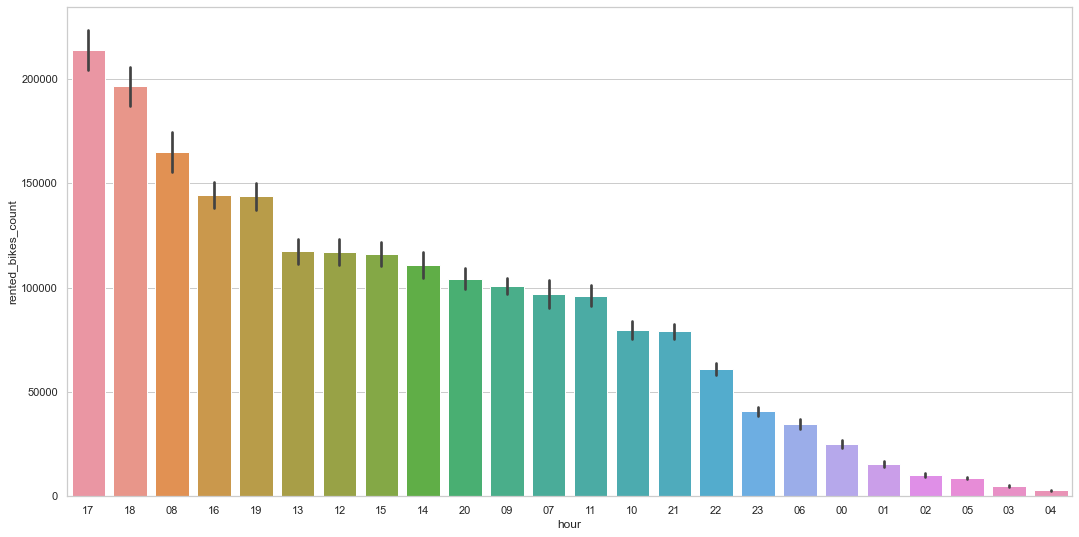

In [149]:
sns.barplot(data=df, x= 'hour', y= 'rented_bikes_count', order=x.index,estimator=sum)
# hour 17 always has the maximum rate of rented bikes

# 8- what is the average profit for each season

In [150]:
x = df.groupby('season')['Profit'].mean().sort_values(ascending=False)
x

season
Fall      1682.572797
Summer    1533.249029
Winter    1222.474898
Spring     697.150331
Name: Profit, dtype: float64

<AxesSubplot:xlabel='season', ylabel='Profit'>

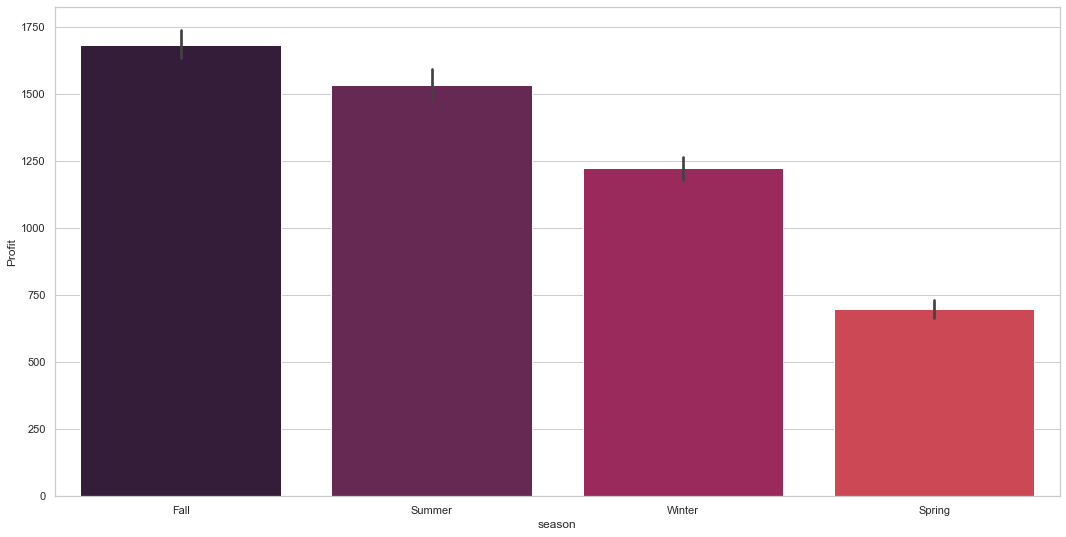

In [151]:
sns.barplot(data=df, x = 'season', y = 'Profit',order=x.index )

# 9- for each year determine the profit

In [170]:
x = df.groupby('year').sum()[['Profit']].sort_values(by= 'Profit',ascending=False)
x

,Profit
year,
2012,8.652604e+06
2011,5.371621e+06


<AxesSubplot:xlabel='year', ylabel='Profit'>

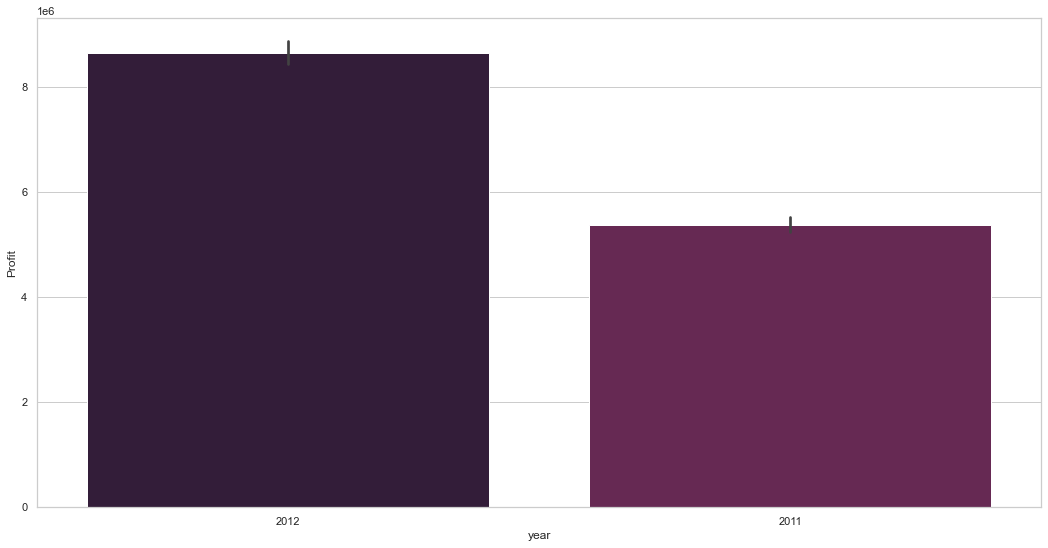

In [171]:
sns.barplot(data=df, x = 'year', y= 'Profit', order=x.index,estimator=sum)

#### year 2012 has a higher profit so we have to check what makes it increased and to improve the process

# 9- for each year determine each month profit

In [152]:
x= pd.pivot_table(data=df, index='year',columns='month',values= 'Profit', aggfunc=sum)
x

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2011,127102.998630,189863.230137,268523.130137,374899.289041,547346.317808,638798.717808,736438.817808,584876.717808,576281.531507,563217.789041,435744.117808,328527.917808
2012,309797.631507,356099.689041,628599.289041,858361.360274,845706.117808,936801.617808,843474.417808,924808.917808,929560.417808,819914.717808,649845.589041,549633.917808


<AxesSubplot:xlabel='month', ylabel='year'>

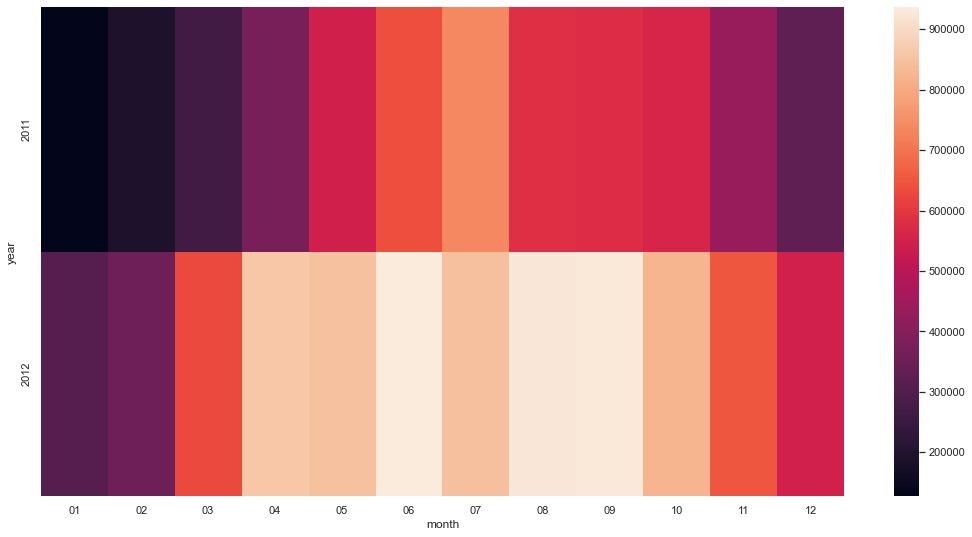

In [153]:
sns.heatmap(x)

<AxesSubplot:xlabel='month', ylabel='Profit'>

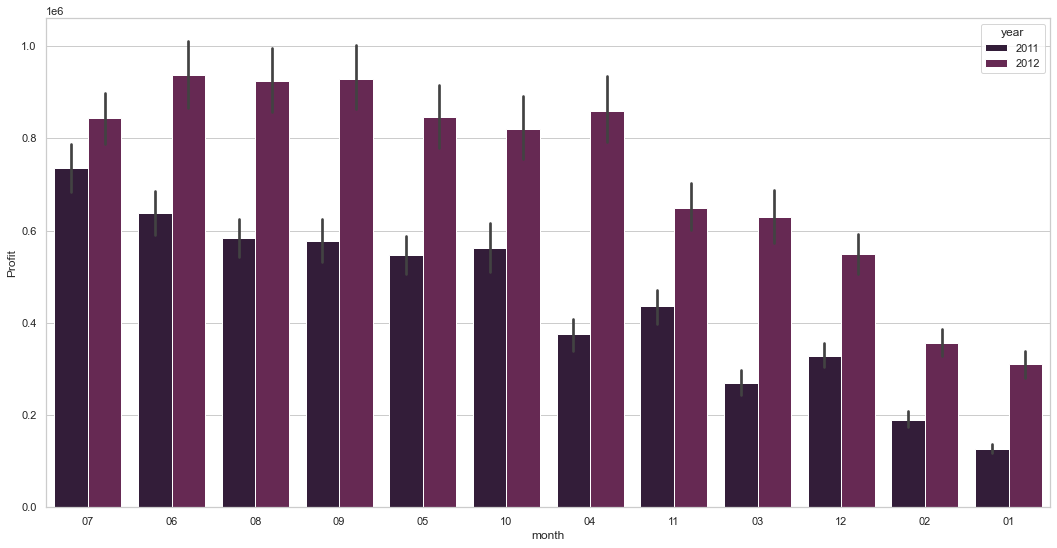

In [154]:
x = df.groupby('month')['Profit'].sum().sort_values(ascending=False)
sns.barplot(data=df, x = 'month', y= 'Profit',hue= 'year',order=x.index,estimator=sum)

# 10- which weather is better for renting bikes 

In [155]:
s = df.groupby('weather')['rented_bikes_count'].sum().sort_values(ascending=False)
s

weather
Clear    1182406
Mist      405992
Rainy      82288
Snowy        164
Name: rented_bikes_count, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

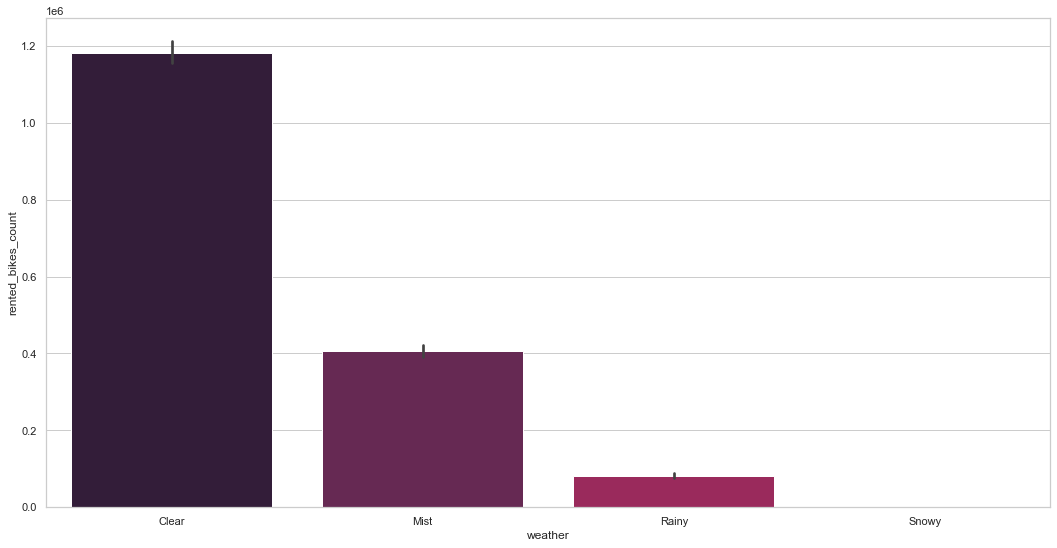

In [156]:
sns.barplot(data=df,x= 'weather',y= 'rented_bikes_count',order=s.index,estimator= sum)

* most rented bikes was in a clear weather 

# 11- which weather is gaining higher profit

In [196]:
s = df.groupby('weather')['Profit'].sum().sort_values(ascending=False)
s

weather
Clear    8.062699e+06
Mist     2.645321e+06
Rainy    5.096033e+05
Snowy    7.824288e+02
Name: Profit, dtype: float64

<AxesSubplot:xlabel='weather', ylabel='Profit'>

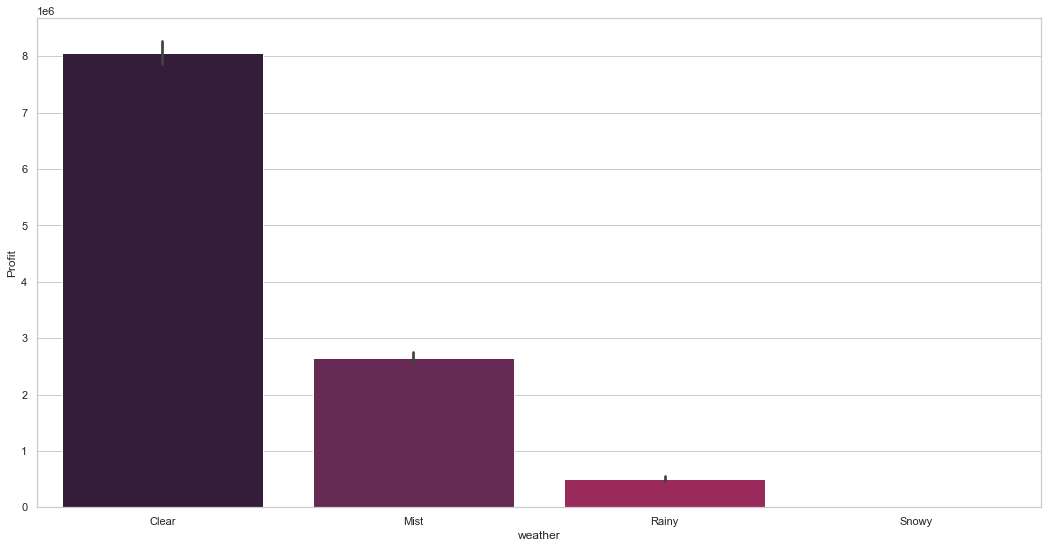

In [197]:
sns.barplot(data=df,x= 'weather',y= 'Profit',order=s.index,estimator= sum)

# 12- effect of season, weather  on profit

<AxesSubplot:xlabel='season', ylabel='Profit'>

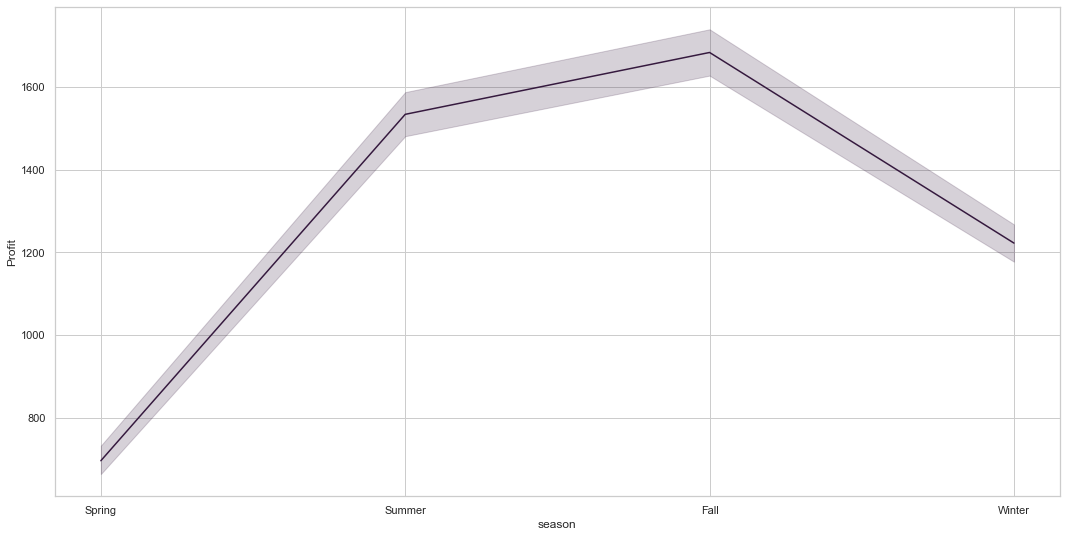

In [157]:
sns.lineplot(data=df,x = 'season', y= 'Profit')

* here we find that the profit increasing in summer and fall 

<AxesSubplot:xlabel='weather', ylabel='Profit'>

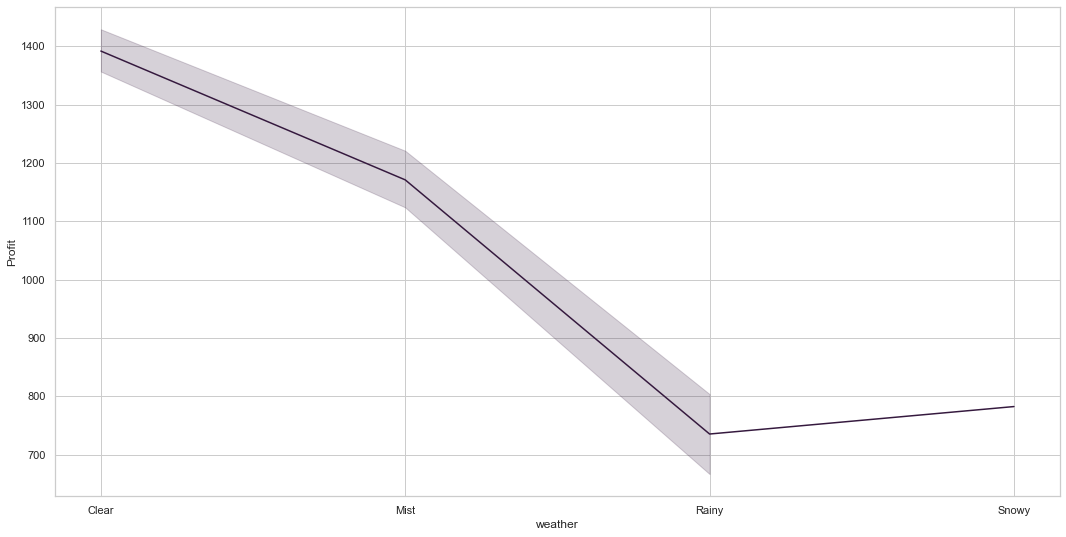

In [200]:
sns.lineplot(data=df,x = 'weather', y= 'Profit')

# 13- for each year (2011,2012) what is the profit for each season 

In [174]:
x = pd.pivot_table(data=df, index= 'year', columns= 'season',values= 'Profit',aggfunc=sum)
x

season,Fall,Spring,Summer,Winter
year,,,,
2011,1.874024e+06,5.734060e+05,1.521365e+06,1.304898e+06
2012,2.635271e+06,1.262888e+06,2.572410e+06,1.981115e+06


<AxesSubplot:xlabel='season', ylabel='year'>

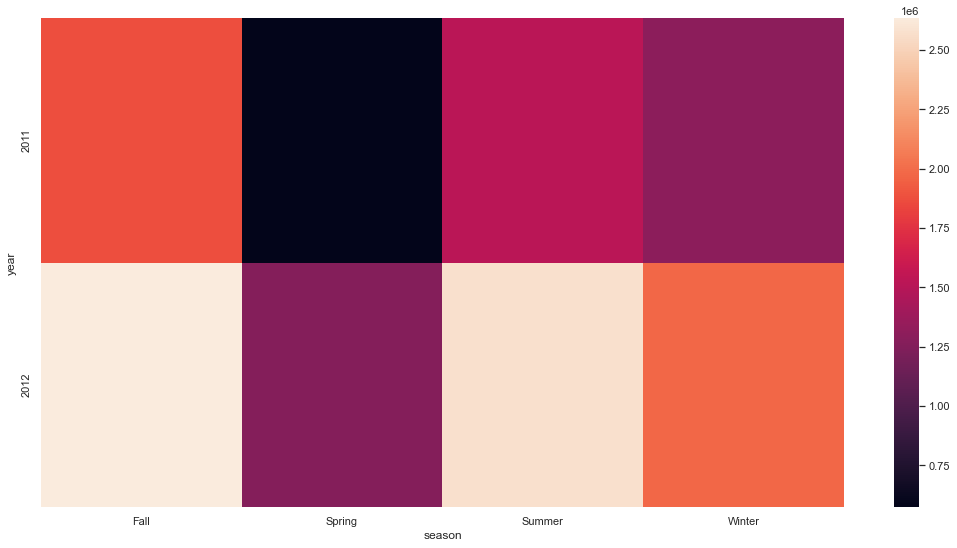

In [175]:
sns.heatmap(x)

* summer and fall always reach the max profit bu it has increased in year 2012

# 14- For year 2011  what is the highest month profit per each season ?

In [213]:
df_2011 = df[df['year']== '2011']

In [188]:
df_2011_sectioned = df_2011.groupby(['season','month'])[['Profit']].sum()
df_2011_sectioned.reset_index(inplace=True)
df_2011_sectioned

,season,month,Profit
0,Fall,07,722955.558904
1,Fall,08,578182.987671
2,Fall,09,572885.387671
3,Spring,01,125925.826027
4,Spring,02,188548.286301
5,Spring,03,258931.884932
6,Summer,04,364792.043836
7,Summer,05,535634.658904
8,Summer,06,620938.230137
9,Winter,10,554624.486301


In [192]:
df_2011_sectioned_max = df_2011_sectioned.groupby('season')['Profit'].max()
df_2011_sectioned_max

season
Fall      722955.558904
Spring    258931.884932
Summer    620938.230137
Winter    554624.486301
Name: Profit, dtype: float64

In [193]:
max_month = df_2011_sectioned[df_2011_sectioned['Profit'].isin(df_2011_sectioned_max)]
max_month

,season,month,Profit
0,Fall,07,722955.558904
5,Spring,03,258931.884932
8,Summer,06,620938.230137
9,Winter,10,554624.486301


<AxesSubplot:xlabel='season', ylabel='Profit'>

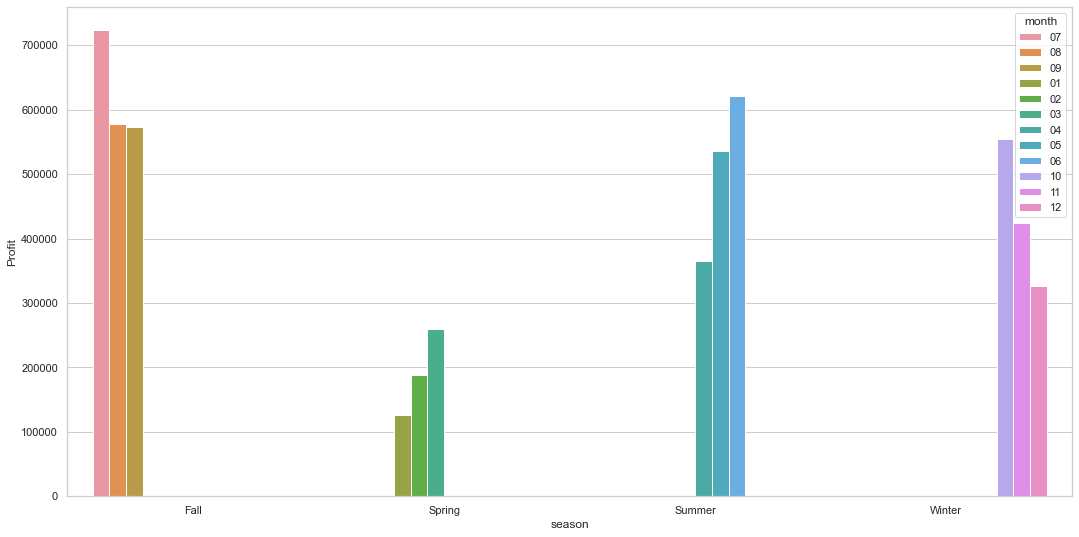

In [195]:
sns.barplot(data=df_2011_sectioned, x = 'season', y='Profit', hue = 'month',estimator=max)

# 15- For each season , weather show outlier in profit ?

<AxesSubplot:xlabel='season', ylabel='Profit'>

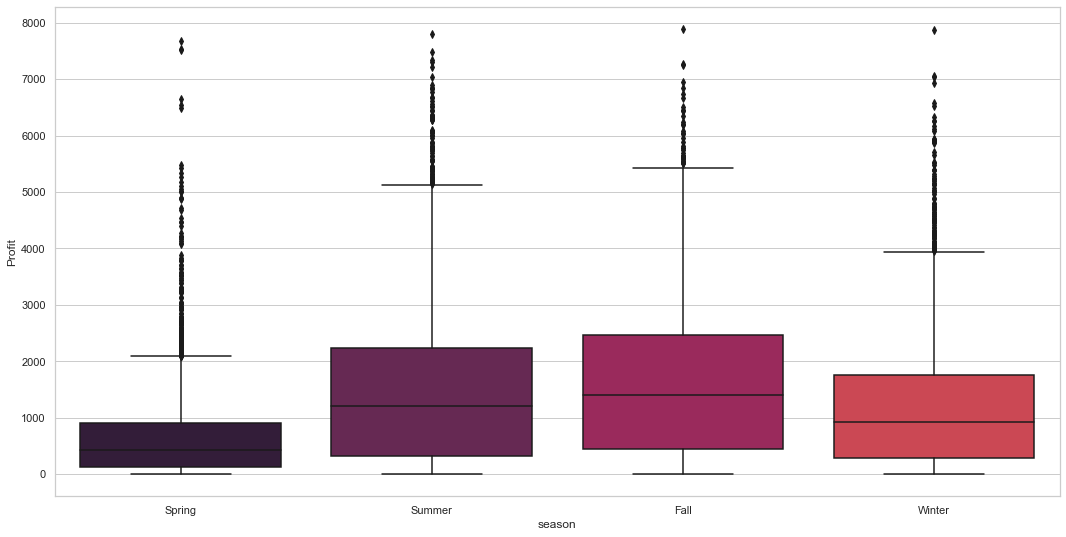

In [198]:
sns.boxplot(data=df, x = 'season', y = 'Profit')

<AxesSubplot:xlabel='weather', ylabel='Profit'>

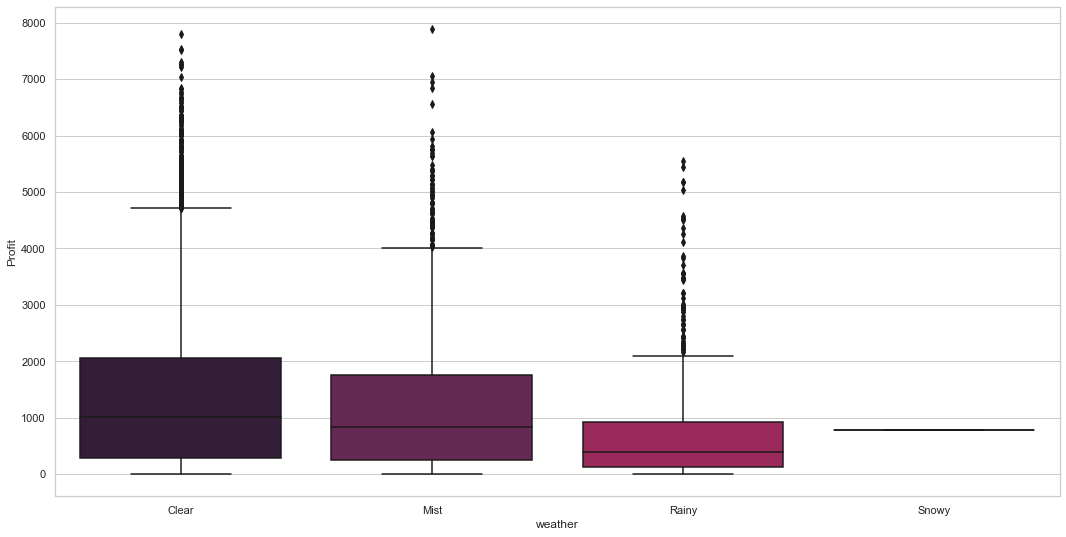

In [201]:
sns.boxplot(data=df, x = 'weather', y = 'Profit')

#  16- is there any corr between temp, humidity, windspeed, casual, registered, rented_bikes_count, Profit

<AxesSubplot:>

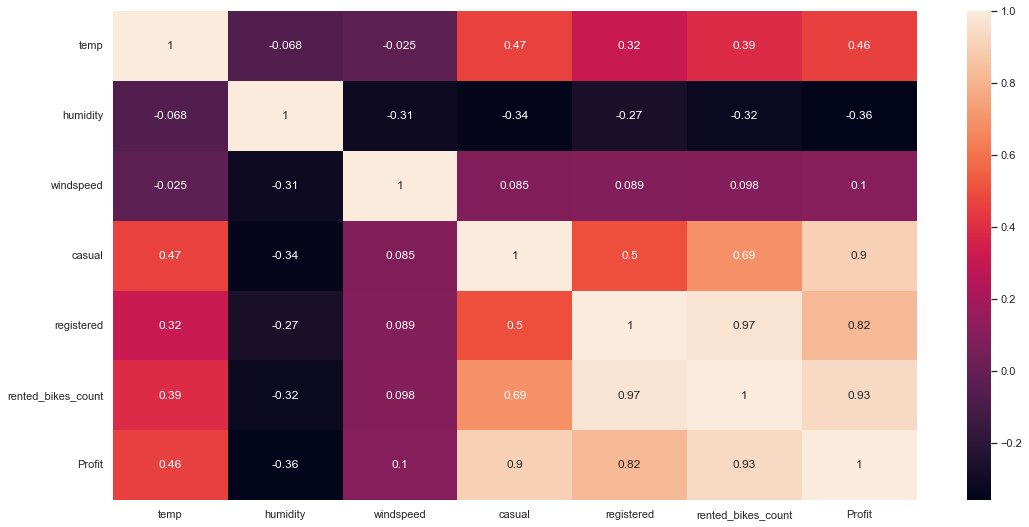

In [206]:
sns.heatmap(corr_map,annot=True)

* Profit with temprature has nearly strong +ve correlation 
* Profit with humidity has nearly strong -ve correlation
* Profit with wind speed has nearly weak +ve correlation

# 17 - chech the correlation between Profit and number of rented bikes

In [210]:
# strong correlation
df['rented_bikes_count'].corr(df['Profit'])

0.9344898870747524

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Profit'>

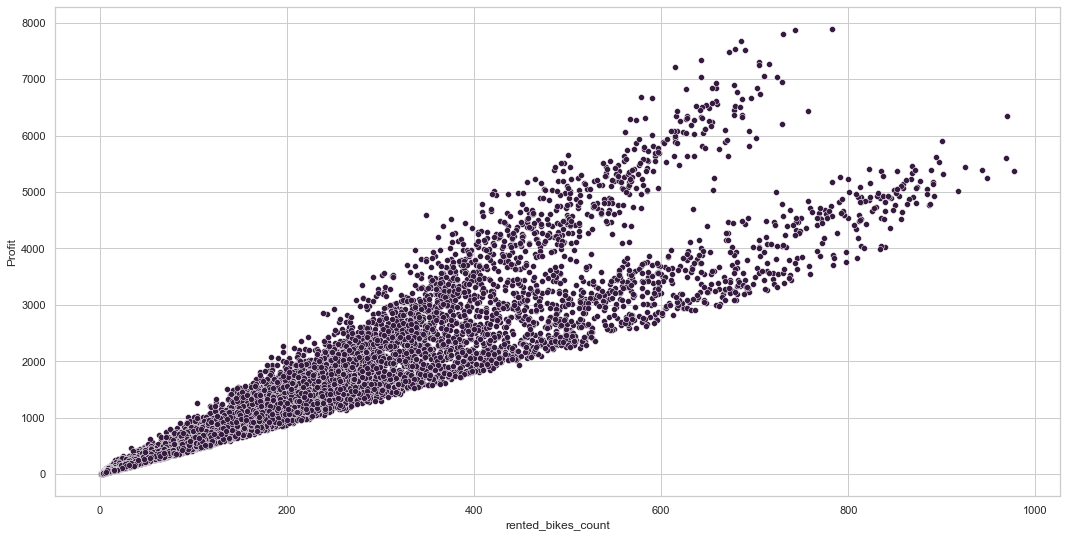

In [211]:
sns.scatterplot(data=df, x = 'rented_bikes_count', y = 'Profit',)

<AxesSubplot:xlabel='rented_bikes_count', ylabel='Profit'>

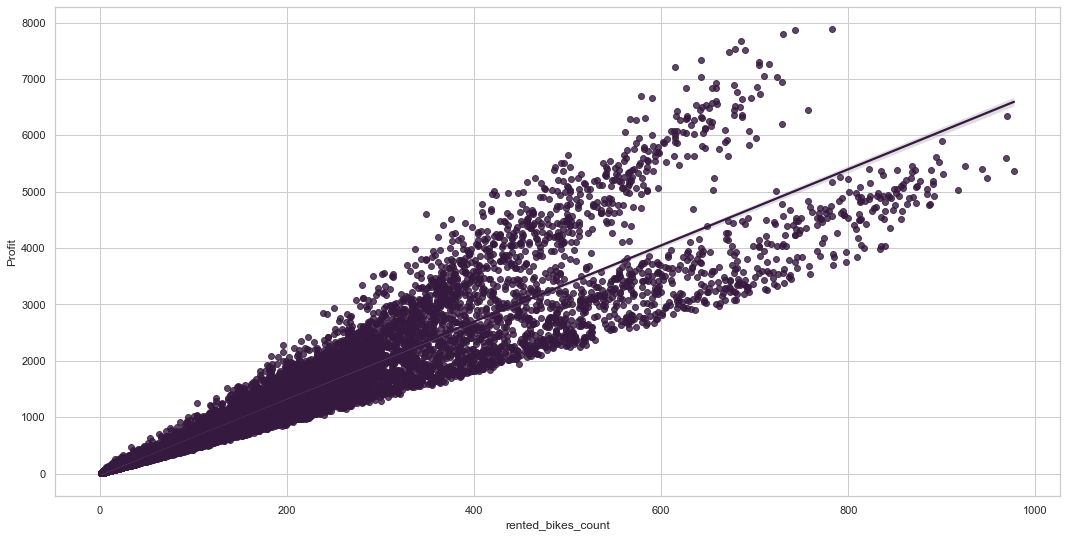

In [212]:
sns.regplot(data = df , x = 'rented_bikes_count' , y = 'Profit')